In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# The assignment

In the following code write the forward and inverse kinematics solution for a 3 degrees of freedom human arm. 
The kinematic parameters are given by following figure.

<img src="./arm.png" style="height:500px"/>

In [2]:
def ik_human_arm_3dof(L, position):
    """
    inverse kinematics function for a 3DOF human arm
    Args:
        L : list of bone lengths of the human arm L[0] shoulder bone, L[1] upper arm and L[2] forearm
        position : target position of the hand
    
    Returns:
        q: list of joint angles

    """
    q = np.zeros(3)

    return q

In [3]:
def fk_human_arm_3dof(L,q):
    """
    forwardatics function for a 3DOF human arm
  
    Args:
        L : list of bone lengths of the human arm L[0] shoulder bone, L[1] upper arm and L[2] forearm
        q: list of joint angles
    
    Returns: 
        position: reached hand position
    """

    position = np.zeros(3)

    return position


### Helping function for ploting 

In [4]:
def plot_human(plt, L, q):
    """
    helping function drawing a human 
    
    Args:
        plt: matplotlib plot object
        L : list of bone lengths of the human arm L[0] shoulder bone, L[1] upper arm and L[2] forearm
        q : list of joint angles 
    
    """
    pos_shoulder = np.array([[L[0]],[0],[0]])
    pos_elbow = pos_shoulder + L[1]*np.array([[np.sin(q[1])*np.sin(q[0])],
                               [np.sin(q[1])*np.cos(q[0])],
                               [-np.cos(q[1])]])
    pos_hand = pos_elbow + L[2]*np.array([
                             [np.sin(q[1]+q[2])*np.sin(q[0])], 
                             [np.sin(q[1]+q[2])*np.cos(q[0])], 
                             [-np.cos(q[1]+q[2])]
                             ])
    
    x = np.hstack((pos_shoulder, pos_elbow, pos_hand))
    plt.plot(x[0,:],x[1,:],x[2,:],linewidth=2, label="arm")
    
    x1 = np.array([[-L[0]],[0],[0]])
    x2 = x1 + np.array([[0],[0],[-L[1]]])
    x3 = x2 + np.array([[0],[0],[-L[2]]])
    x = np.hstack((pos_shoulder,x1,x2,x3))
    
    plt.plot(x[0,:],x[1,:],x[2,:],linewidth=2, label="human")
    plt.plot(x[0,:],x[1,:],x[2,:],'ko',linewidth=1)   
    head = (x1+pos_shoulder)/2
    head[2] = head[2]+0.3
    plt.plot(head[0],head[1],head[2],'yo',linewidth=10,label='head')
    plt.plot(pos_shoulder[0],pos_shoulder[1],pos_shoulder[2],'ro',linewidth=3,label='shoulder')
    plt.plot(pos_elbow[0],pos_elbow[1],pos_elbow[2],'ko',linewidth=1,label='elbow')
    plt.plot(pos_hand[0],pos_hand[1],pos_hand[2],'go',linewidth=1,label='hand')
    
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    ax = fig.gca()
    ax.set_zlim(-2, 0.5)

# Forward kinematics testing script

<IPython.core.display.Javascript object>


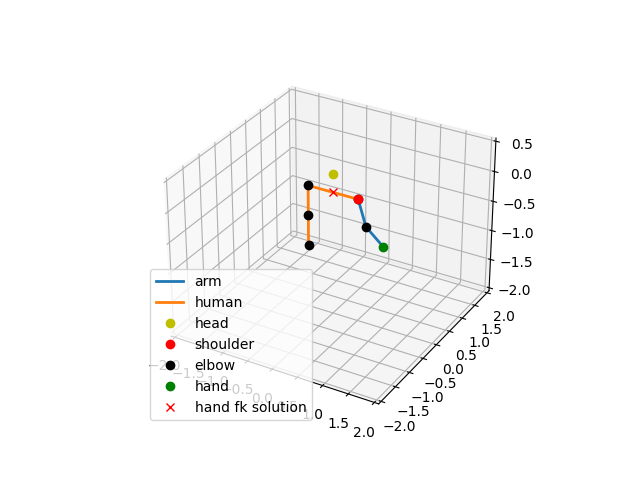

In [5]:
# create the plot
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')


# define the arm parameters
bone_lenghts = [0.5, # shoulder distance from the head
                0.5, # upper arm leght (shoulder to the elbow)
                0.5] # forearm lenght (elbow to the hand)

# choose some joint anles
joint_angles = [0.7, 0.3, 0.4] 

# plot the human
plot_human(plt,bone_lenghts,joint_angles)

# find the hand position
# using the forward kinematics function
hand_position = fk_human_arm_3dof(bone_lenghts,joint_angles)
plt.plot(hand_position[0],hand_position[1],hand_position[2],'rx',label='hand fk solution')

# display the legend
plt.legend()

# Inverse kinematics testing script

<IPython.core.display.Javascript object>


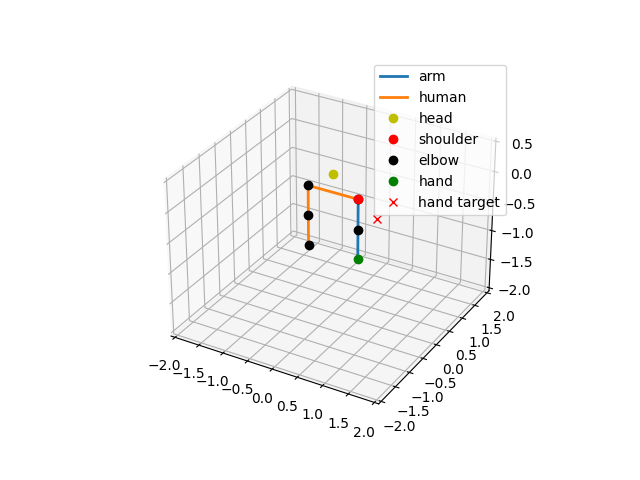

In [6]:
# create the plot
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')


# define the arm parameters
bone_lenghts = [0.5, # shoulder distance from the head
                0.5, # upper arm leght (shoulder to the elbow)
                0.5] # forearm lenght (elbow to the hand)

# choose some position in space
hand_position_target = [0.7, 0.3, -0.4] 

# find the joint angles
# using the inverse kinematics function
joint_angles = ik_human_arm_3dof(bone_lenghts,hand_position_target)

# plot the human
plot_human(plt,bone_lenghts,joint_angles)

plt.plot(hand_position_target[0],hand_position_target[1],hand_position_target[2],'rx',label='hand target')

# display the legend
plt.legend()